In [1]:
import gym
import numpy as np
from collections import deque
from IPython.display import clear_output
import pandas as pd
from collections import defaultdict

In [2]:
env = gym.make('Taxi-v2')

In [37]:
class SarsaAgent():
    def __init__(self, env, epsilon, gamma, alpha, epsilon_decay, epsilon_min, alpha_decay, alpha_min):
        self.epsilon_decay=epsilon_decay
        self.alpha_decay=alpha_decay
        self.alpha_min=alpha_min
        self.epsilon_min=epsilon_min
        self.nA=6
        self.gamma=gamma
        self.alpha=alpha
        self.epsilon=epsilon
        self.Q=defaultdict(lambda : np.zeros(self.nA))
    def act(self, state, Q_s):
        policy=np.ones(self.nA)*(self.epsilon/self.nA)
        policy[np.argmax(Q_s)]=1-self.epsilon+self.epsilon/self.nA
        return np.random.choice(np.arange(self.nA), p=policy)
    def update(self, state, action, reward, next_state, done):
        if self.epsilon>self.epsilon_min:
            self.epsilon = self.epsilon_decay*self.epsilon
        if self.alpha>self.alpha_min:
            self.alpha*=self.alpha_decay
        if not done:
            self.Q[state][action]=(1-self.alpha)*self.Q[state][action]+self.alpha*(reward+self.gamma*self.Q[next_state][next_action])
        else:
            self.Q[state][action]=reward
            

In [38]:
class QAgent():
    def __init__(self, env, epsilon, gamma, alpha, epsilon_decay, epsilon_min, alpha_decay, alpha_min):
        self.epsilon_decay=epsilon_decay
        self.alpha_min=alpha_min
        self.alpha_decay=alpha_decay
        self.epsilon_min=epsilon_min
        self.nA=6
        self.gamma=gamma
        self.alpha=alpha
        self.epsilon=epsilon
        self.Q=defaultdict(lambda : np.zeros(self.nA))
    def act(self, state, Q_s):
        policy=np.ones(self.nA)*(self.epsilon/self.nA)
        policy[np.argmax(Q_s)]=1-self.epsilon+self.epsilon/self.nA
        return np.random.choice(np.arange(self.nA), p=policy)
    def update(self, state, action, reward, next_state, done):
        if self.epsilon>self.epsilon_min:
            self.epsilon = self.epsilon_decay*self.epsilon
        if self.alpha>self.alpha_min:
            self.alpha*=self.alpha_decay
        if not done:
            self.Q[state][action]=(1-self.alpha)*self.Q[state][action]+self.alpha*(reward+self.gamma*np.max(self.Q[next_state]))
        else:
            self.Q[state][action]=reward
            

In [39]:
class Esarsa_Agent():
    def __init__(self, env, epsilon, gamma, alpha, epsilon_decay, epsilon_min, alpha_decay, alpha_min):
        self.epsilon_min=epsilon_min
        self.alpha_decay=alpha_decay
        self.alpha_min=alpha_min
        self.epsilon_decay=epsilon_decay
        self.nA=6
        self.gamma=gamma
        self.alpha=alpha
        self.epsilon=epsilon
        self.Q=defaultdict(lambda:np.zeros(self.nA))
    def act(self, state, Q_s):
        policy=np.ones(self.nA)*(self.epsilon/self.nA)
        policy[np.argmax(Q_s)]=1-self.epsilon+self.epsilon/self.nA
        return np.random.choice(np.arange(self.nA), p=policy)
    def update(self, state, action, reward, next_state, done):
        if self.epsilon>self.epsilon_min:
            self.epsilon = self.epsilon_decay*self.epsilon
        if self.alpha>self.alpha_min:
            self.alpha*=self.alpha_decay
        policy=np.ones(self.nA)*(self.epsilon/self.nA)
        policy[np.argmax(self.Q[next_state])]=1-self.epsilon+self.epsilon/self.nA
        if not done:
            self.Q[state][action]=(1-self.alpha)*self.Q[state][action]+self.alpha*(reward+self.gamma*np.dot(policy,self.Q[next_state]))
        else:
            self.Q[state][action]=reward
            

In [34]:
agent = QAgent(env=env, epsilon=1.0, gamma=1.0, alpha=0.1, alpha_decay=0.99999, alpha_min=0.001, epsilon_min=0.01, epsilon_decay=0.99)
score=deque(maxlen=100)
Q_scores=list()
for i_episode in range(5000):
    tot=0
    state=env.reset()
    while True:
        action=agent.act(state, agent.Q[state])
        next_state, reward, done, _ = env.step(action)
        next_action=agent.act(next_state, agent.Q[next_state])
        agent.update(state, action, reward, next_state, done)
        tot+=reward
        state=next_state
        if done:
            score.append(tot)
            Q_scores.append(np.mean(score))
            print("Episode {} ... score: {}".format(i_episode, np.mean(score)))
            clear_output(True)
            break

Episode 4999 ... score: 6.41


In [35]:
agent = Esarsa_Agent(env=env, epsilon=1.0, gamma=1.0, alpha=0.1, alpha_decay=0.99999, alpha_min=0.001, epsilon_min=0.01, epsilon_decay=0.99)
score=deque(maxlen=100)
Esarsa_scores=list()
for i_episode in range(5000):
    tot=0
    state=env.reset()
    while True:
        action=agent.act(state, agent.Q[state])
        next_state, reward, done, _ = env.step(action)
        next_action=agent.act(next_state, agent.Q[next_state])
        agent.update(state, action, reward, next_state, done)
        tot+=reward
        state=next_state
        if done:
            score.append(tot)
            Esarsa_scores.append(np.mean(score))
            print("Episode {} ... score: {}".format(i_episode, np.mean(score)))
            clear_output(True)
            break

Episode 4999 ... score: 7.5


In [40]:
agent = SarsaAgent(env=env, epsilon=1.0, gamma=1.0, alpha=0.1, alpha_decay=0.99999, alpha_min=0.001, epsilon_min=0.01, epsilon_decay=0.99)
score=deque(maxlen=100)
sarsa_scores=list()
for i_episode in range(5000):
    tot=0
    state=env.reset()
    while True:
        action=agent.act(state, agent.Q[state])
        next_state, reward, done, _ = env.step(action)
        next_action=agent.act(next_state, agent.Q[next_state])
        agent.update(state, action, reward, next_state, done)
        tot+=reward
        state=next_state
        if done:
            score.append(tot)
            sarsa_scores.append(np.mean(score))
            print("Episode {} ... score: {}".format(i_episode, np.mean(score)))
            clear_output(True)
            break

Episode 4999 ... score: 7.66


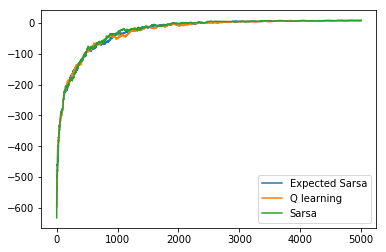

In [42]:
import matplotlib.pyplot as plt
plt.plot(Esarsa_scores)
plt.plot(Q_scores)
plt.plot(sarsa_scores)
plt.legend(['Expected Sarsa', 'Q learning', 'Sarsa'])